In [161]:
import numpy as np
import pandas as pd
from pandas import read_csv,set_option
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [162]:
df=pd.read_csv("Sonar_dataset",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [163]:
df.values

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [166]:
set_option('display.width',100)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [167]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [168]:
#no null values

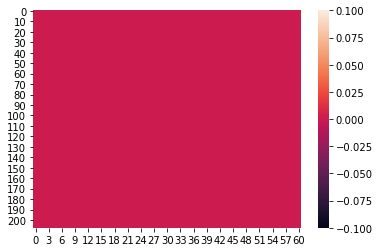

In [169]:
sns.heatmap(df.isnull())

In [170]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
# Mean & Mode values are close
# Not much deviation from the mean

In [171]:
df.groupby(60).size()

60
M    111
R     97
dtype: int64

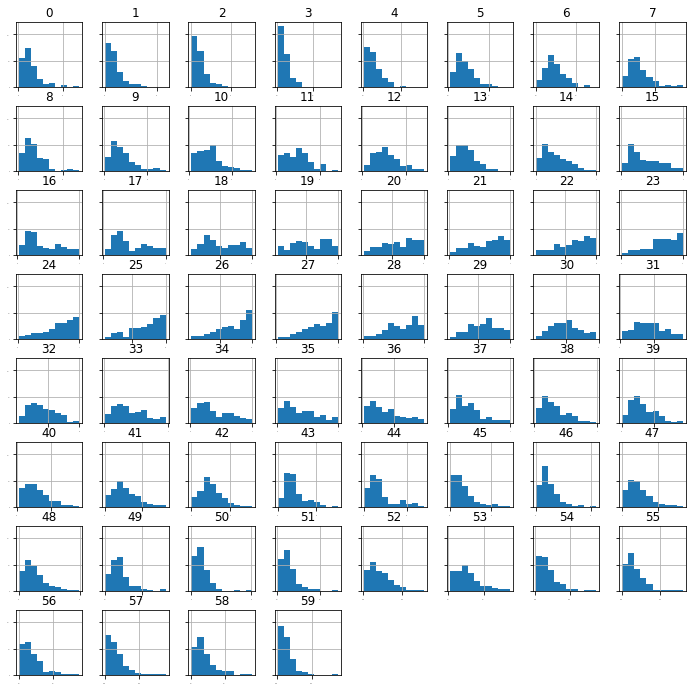

In [172]:
df.hist(sharex=False, sharey=True, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

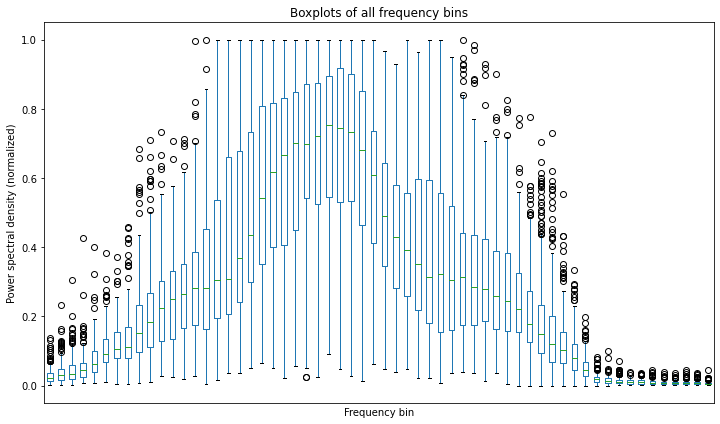

In [173]:
df.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

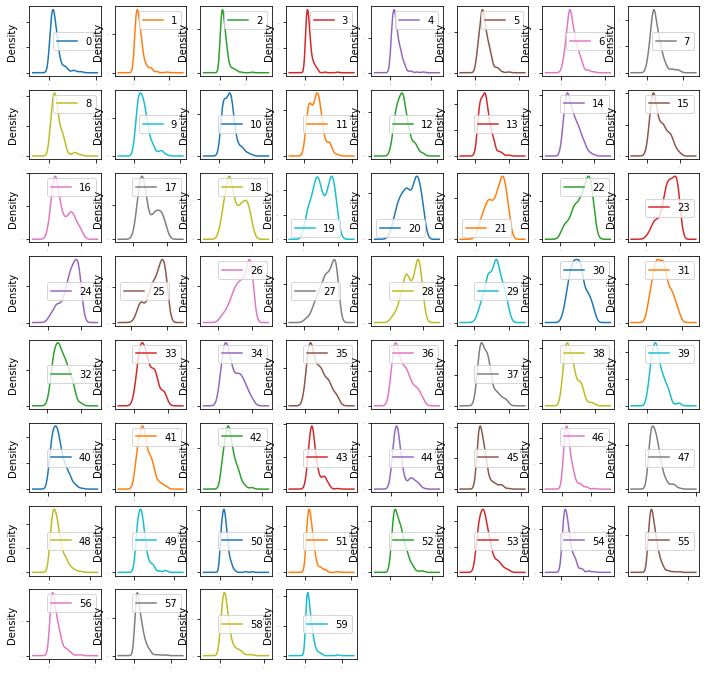

In [174]:
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=True, fontsize=1, figsize=(12,12))
plt.show()

In [175]:
le=LabelEncoder()

In [176]:
df[60]=le.fit_transform(df[60])
df[60].head()

0    1
1    1
2    1
3    1
4    1
Name: 60, dtype: int32

In [177]:
df.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
        ...   
56    1.653090
57    2.098330
58    1.737506
59    2.775754
60    0.135903
Length: 61, dtype: float64

In [178]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [179]:
print("Original shape=",df.shape,"\nNew Shape=",new_df.shape)

Original shape= (208, 61) 
New Shape= (168, 61)


In [180]:
percentage_Loss_data=(((208-168)/208)*100)
percentage_Loss_data

19.230769230769234

In [210]:
new_dfcorr=new_df.corr()
new_dfcorr

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.606951,0.494378,0.297647,0.238952,0.223495,0.190309,0.267078,0.225463,0.281091,...,0.032960,0.102006,0.052542,0.183766,0.249330,0.259425,0.218116,0.271661,0.280020,-0.194678
1,0.606951,1.000000,0.705483,0.422593,0.286709,0.272142,0.174825,0.215852,0.222288,0.267577,...,0.178945,0.247151,0.239576,0.333562,0.313411,0.289292,0.273874,0.286762,0.325590,-0.164338
2,0.494378,0.705483,1.000000,0.589044,0.363675,0.254874,0.134300,0.284794,0.275083,0.293852,...,0.232363,0.254387,0.203008,0.230790,0.350302,0.389202,0.241480,0.299664,0.320494,-0.126514
3,0.297647,0.422593,0.589044,1.000000,0.576257,0.301838,0.221596,0.304434,0.153422,0.187116,...,0.253167,0.260006,0.157887,0.113845,0.323666,0.258770,0.278005,0.367215,0.279193,-0.200709
4,0.238952,0.286709,0.363675,0.576257,1.000000,0.606775,0.303244,0.238835,0.214797,0.252862,...,0.260969,0.291406,0.132799,0.097434,0.135541,0.063082,0.147854,0.210557,0.131323,-0.229517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.259425,0.289292,0.389202,0.258770,0.063082,0.105796,0.099336,0.201206,0.000433,-0.031057,...,-0.005252,0.202160,0.288959,0.265560,0.488056,1.000000,0.434754,0.366053,0.315848,0.130020
57,0.218116,0.273874,0.241480,0.278005,0.147854,0.145701,0.090756,0.168416,0.085625,0.075941,...,0.115899,0.127611,0.315680,0.297936,0.281212,0.434754,1.000000,0.436534,0.296908,-0.078758
58,0.271661,0.286762,0.299664,0.367215,0.210557,0.163716,0.181637,0.177884,0.013843,0.067199,...,0.156189,0.260148,0.281057,0.299013,0.308445,0.366053,0.436534,1.000000,0.606350,-0.017252
59,0.280020,0.325590,0.320494,0.279193,0.131323,0.167355,0.173110,0.173271,0.011882,0.096421,...,0.059479,0.246620,0.274381,0.172441,0.340376,0.315848,0.296908,0.606350,1.000000,0.005439


In [182]:
x=new_df.iloc[:,:-1]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053


In [183]:
y=new_df.iloc[:,-1:]
y


,60
0,1
1,1
4,1
6,1
7,1
...,...
203,0
204,0
205,0
206,0


In [184]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   60      168 non-null    int32
dtypes: int32(1)
memory usage: 2.0 KB


In [185]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [186]:
new_df.skew()

0     1.260141
1     1.305137
2     1.651471
3     1.237233
4     0.921870
        ...   
56    1.378156
57    1.364882
58    1.464334
59    1.144572
60    0.000000
Length: 61, dtype: float64

In [187]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [188]:
new_df.skew()

0     1.260141
1     1.305137
2     1.651471
3     1.237233
4     0.921870
        ...   
56    1.378156
57    1.364882
58    1.464334
59    1.144572
60    0.000000
Length: 61, dtype: float64

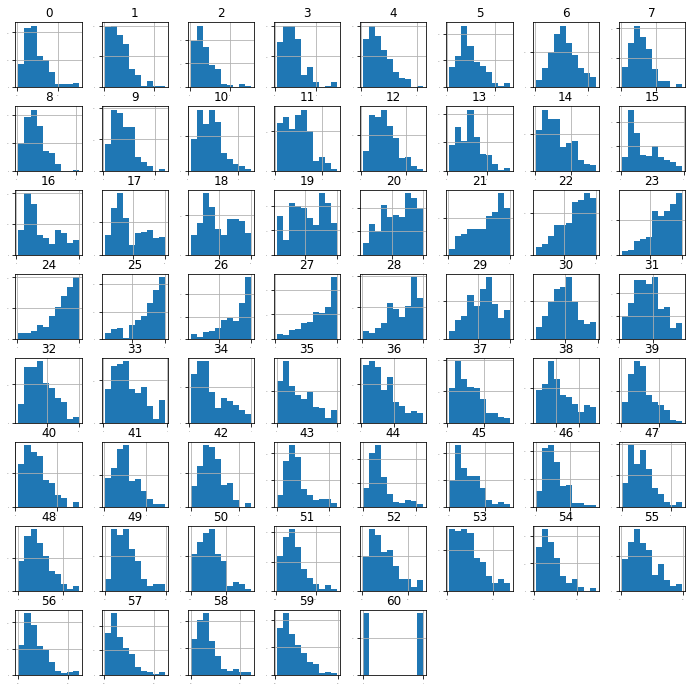

In [189]:
new_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [191]:
x_train.shape

(134, 60)

In [192]:
y_train.shape

(134, 1)

In [193]:
x_test.shape

(34, 60)

In [194]:
y_test.shape

(34, 1)

In [197]:
lg=LogisticRegression()

In [198]:
lg.fit(x_train,y_train)

LogisticRegression()

In [199]:
pred=lg.predict(x_test)
print(pred)

[0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0]


In [204]:
print("accuracy_score:",accuracy_score(y_test,pred))
print("confusion_matrix:\n",confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


accuracy_score: 0.9705882352941176
confusion_matrix:
 [[14  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [207]:
import joblib
joblib.dump(pred,"Sonar_dataset.pkl")

['Sonar_dataset.pkl']